***Creating a deep learning model for classifying kidney conditions (stone, cyst, normal, tumor) using Convolutional Neural Networks (CNNs) with architectures like VGG16 and MobileNet is a great approach, especially when working with medical imaging data.***
**"For further learning about these models, you can explore relevant websites and resources."**
* [CNN](http://https://www.tensorflow.org/tutorials/images/cnn)
* [VGG16](http://https://datagen.tech/guides/computer-vision/vgg16/#:~:text=The%20VGG16%20model%20can%20achieve,smaller%203%C3%973%20filters.)
* [MobileNet](http://https://builtin.com/machine-learning/mobilenet)

# Importing Libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
 

from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.models import Model,Sequential
 
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D

**Defining size**

In [35]:
batch_size = 32
img_height = 150
img_width = 150

# Loading Data

In [36]:
data_dir='/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone'
train=tf.keras.utils.image_dataset_from_directory(data_dir,image_size=(img_height,img_width),
                                                validation_split=0.1,
                                                subset='training',seed=123)
val=tf.keras.utils.image_dataset_from_directory(data_dir,image_size=(img_height,img_width),
                                                validation_split=0.2,
                                                subset='validation',seed=123)

Found 12446 files belonging to 4 classes.
Using 11202 files for training.
Found 12446 files belonging to 4 classes.
Using 2489 files for validation.


**Labels**

In [37]:
label_to_class_name = dict(zip(range(len(train.class_names)), train.class_names))
label_to_class_name

{0: 'Cyst', 1: 'Normal', 2: 'Stone', 3: 'Tumor'}

**Size**

In [38]:
for image_batch, labels_batch in train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 150, 150, 3)
(32,)


# Images

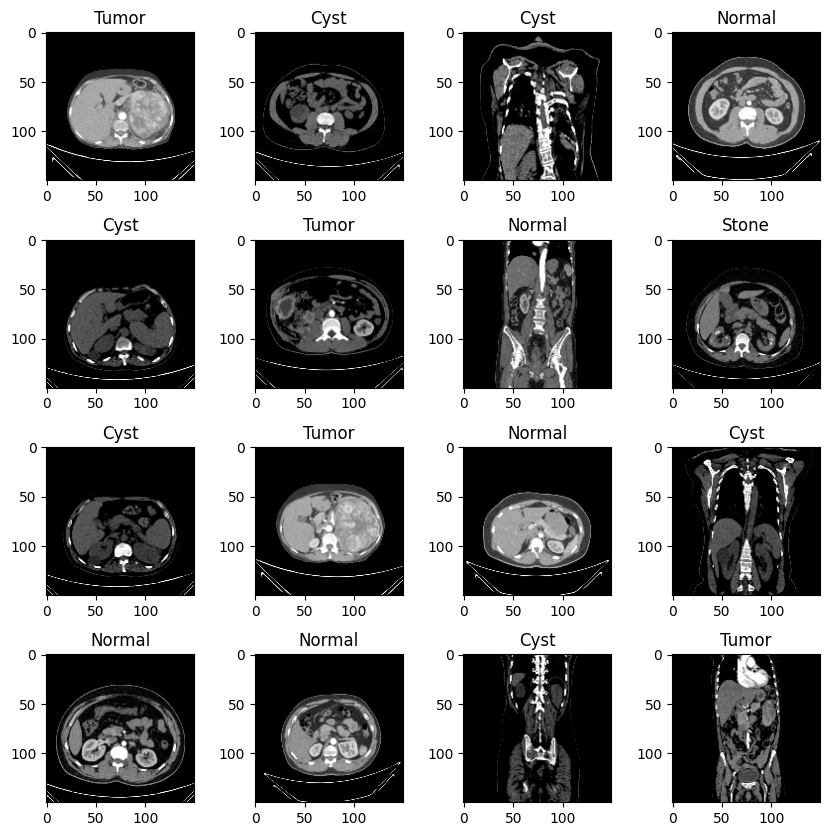

In [39]:
data_iterator = train.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
for i in range(4):  
    for j in range(4):  
        index = i * 4 + j  
        ax[i, j].imshow(batch[0][index].astype(int))
        ax[i, j].set_title(label_to_class_name[batch[1][index]])
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

**Data preprocessing**

In [40]:
train=train.map(lambda x,y:(x/255,y))
val=val.map(lambda x,y:(x/255,y))

In [41]:
AUTOTUNE = tf.data.AUTOTUNE

train = train.cache().prefetch(buffer_size=AUTOTUNE)
val = val.cache().prefetch(buffer_size=AUTOTUNE)

# Training Models

**CNN Model**

In [42]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax)
])

In [43]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [44]:
epochs=15
history = model.fit(
  train,
  validation_data=val,
  epochs=epochs
)

Epoch 1/15
351/351 [==============================] - 22s 57ms/step - loss: 0.1348 - accuracy: 0.9545 - val_loss: 9.5178e-04 - val_accuracy: 1.0000
Epoch 2/15
351/351 [==============================] - 4s 12ms/step - loss: 0.0020 - accuracy: 0.9996 - val_loss: 2.3157e-04 - val_accuracy: 1.0000
Epoch 3/15
351/351 [==============================] - 4s 12ms/step - loss: 1.4747e-04 - accuracy: 1.0000 - val_loss: 1.1399e-04 - val_accuracy: 1.0000
Epoch 4/15
351/351 [==============================] - 4s 12ms/step - loss: 7.2396e-05 - accuracy: 1.0000 - val_loss: 6.8961e-05 - val_accuracy: 1.0000
Epoch 5/15
351/351 [==============================] - 4s 12ms/step - loss: 4.4202e-05 - accuracy: 1.0000 - val_loss: 4.5343e-05 - val_accuracy: 1.0000
Epoch 6/15
351/351 [==============================] - 4s 12ms/step - loss: 2.9108e-05 - accuracy: 1.0000 - val_loss: 3.1454e-05 - val_accuracy: 1.0000
Epoch 7/15
351/351 [==============================] - 4s 12ms/step - loss: 2.0119e-05 - accuracy: 1.0

**Ploting Loss and Accuracy**

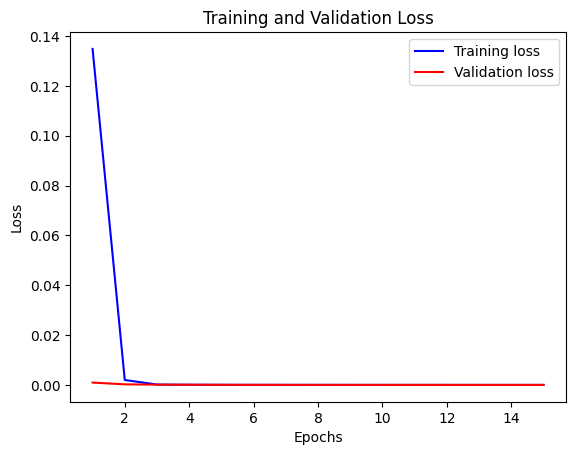

In [45]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

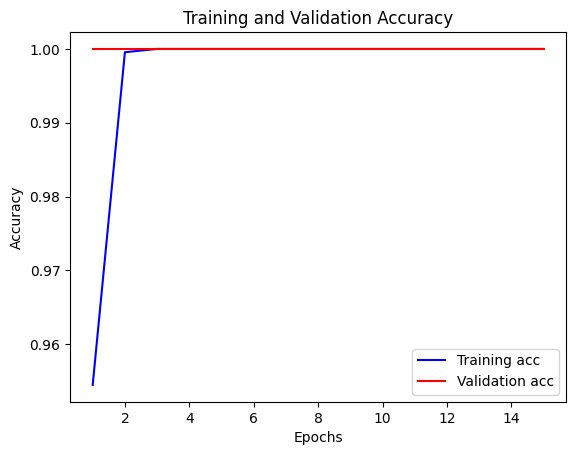

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Prediction**

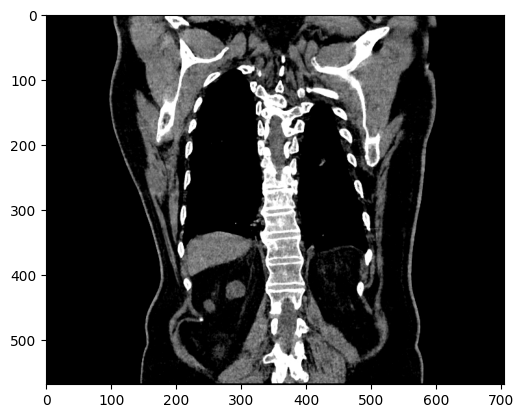

1/1 [==============================] - 0s 59ms/step


'Cyst'

In [47]:
img = cv2.imread('/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (1).jpg')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (150,150))
yhat = model.predict(np.expand_dims(resize/255, 0))
max_index = np.argmax(yhat)
label_to_class_name[max_index]

**VGG16 Model**

In [48]:
VGG_model = Sequential()

pretrained_model= tf.keras.applications.VGG16(include_top=False,
                   input_shape=(150,150,3),
                   pooling='max',classes=4,
                   weights='imagenet')


VGG_model.add(pretrained_model)
VGG_model.add(Flatten())
VGG_model.add(Dense(512, activation='relu'))
VGG_model.add(BatchNormalization())  # Batch Normalization layer
VGG_model.add(Dropout(0.5))

VGG_model.add(Dense(4, activation='softmax'))
pretrained_model.trainable=False

In [49]:
VGG_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [50]:
VGG_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten_4 (Flatten)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 512)               262656    
                                                                 
 batch_normalization_2 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 4)                 2052      
                                                      

In [51]:
epochs=15
history = VGG_model.fit(
  train,
  validation_data=val,
  epochs=epochs
)

Epoch 1/15
351/351 [==============================] - 17s 44ms/step - loss: 0.4689 - accuracy: 0.8306 - val_loss: 0.2612 - val_accuracy: 0.9132
Epoch 2/15
351/351 [==============================] - 15s 43ms/step - loss: 0.1749 - accuracy: 0.9397 - val_loss: 0.2333 - val_accuracy: 0.9192
Epoch 3/15
351/351 [==============================] - 15s 43ms/step - loss: 0.1189 - accuracy: 0.9597 - val_loss: 0.0688 - val_accuracy: 0.9827
Epoch 4/15
351/351 [==============================] - 15s 43ms/step - loss: 0.1104 - accuracy: 0.9633 - val_loss: 0.1820 - val_accuracy: 0.9313
Epoch 5/15
351/351 [==============================] - 15s 43ms/step - loss: 0.0944 - accuracy: 0.9712 - val_loss: 0.0681 - val_accuracy: 0.9823
Epoch 6/15
351/351 [==============================] - 15s 43ms/step - loss: 0.0812 - accuracy: 0.9737 - val_loss: 0.1003 - val_accuracy: 0.9683
Epoch 7/15
351/351 [==============================] - 15s 43ms/step - loss: 0.0842 - accuracy: 0.9726 - val_loss: 0.0666 - val_accuracy:

**Ploting Loss and Accuracy**

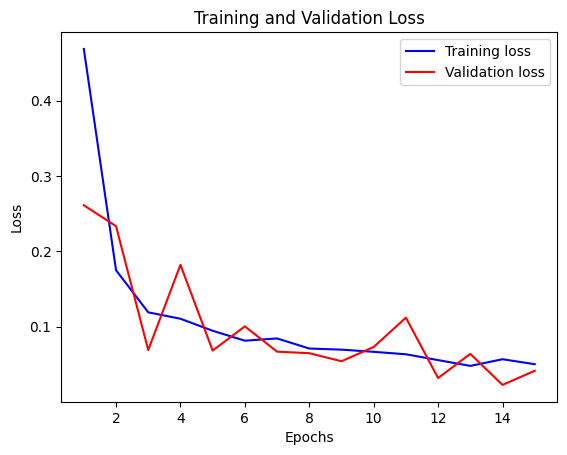

In [52]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

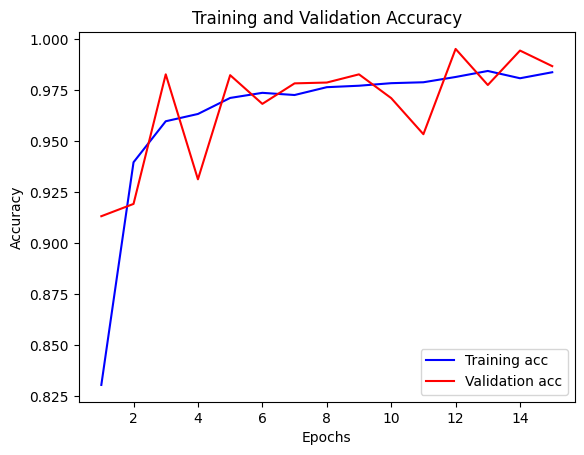

In [53]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

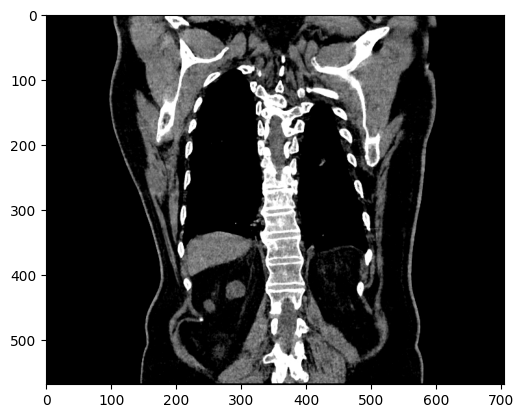

1/1 [==============================] - 0s 163ms/step


'Tumor'

In [54]:
img = cv2.imread('/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (1).jpg')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (150,150))
yhat = VGG_model.predict(np.expand_dims(resize/255, 0))
max_index = np.argmax(yhat)
label_to_class_name[max_index]

**MobileNet Model**

In [55]:
mobile_net = Sequential()

pretrained_model= tf.keras.applications.MobileNetV2(include_top=False,
                   input_shape=(150,150,3),
                   pooling='max',classes=4,
                   weights='imagenet')


mobile_net.add(pretrained_model)
mobile_net.add(Flatten())
mobile_net.add(Dense(512, activation='relu'))
mobile_net.add(BatchNormalization())  # Batch Normalization layer
mobile_net.add(Dropout(0.5))

mobile_net.add(Dense(4, activation='softmax'))
pretrained_model.trainable=False

In [56]:
mobile_net.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [57]:
mobile_net.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1280)             2257984   
 ional)                                                          
                                                                 
 flatten_5 (Flatten)         (None, 1280)              0         
                                                                 
 dense_10 (Dense)            (None, 512)               655872    
                                                                 
 batch_normalization_3 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 4)                

In [58]:
epochs=15
history = mobile_net.fit(
  train,
  validation_data=val,
  epochs=epochs
)

Epoch 1/15
351/351 [==============================] - 11s 22ms/step - loss: 0.4102 - accuracy: 0.8558 - val_loss: 0.1306 - val_accuracy: 0.9554
Epoch 2/15
351/351 [==============================] - 7s 20ms/step - loss: 0.1286 - accuracy: 0.9573 - val_loss: 0.0821 - val_accuracy: 0.9751
Epoch 3/15
351/351 [==============================] - 7s 20ms/step - loss: 0.0846 - accuracy: 0.9717 - val_loss: 0.1397 - val_accuracy: 0.9462
Epoch 4/15
351/351 [==============================] - 7s 20ms/step - loss: 0.0678 - accuracy: 0.9783 - val_loss: 0.1053 - val_accuracy: 0.9634
Epoch 5/15
351/351 [==============================] - 7s 20ms/step - loss: 0.0552 - accuracy: 0.9810 - val_loss: 0.0449 - val_accuracy: 0.9867
Epoch 6/15
351/351 [==============================] - 7s 20ms/step - loss: 0.0485 - accuracy: 0.9854 - val_loss: 0.0519 - val_accuracy: 0.9831
Epoch 7/15
351/351 [==============================] - 7s 20ms/step - loss: 0.0383 - accuracy: 0.9885 - val_loss: 0.0940 - val_accuracy: 0.967

**Ploting Loss and Accuracy**

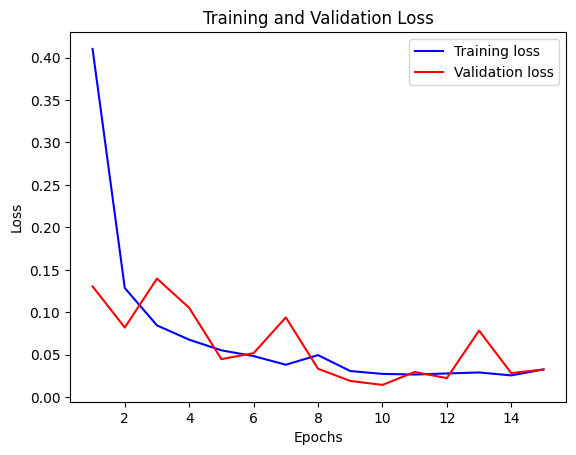

In [59]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

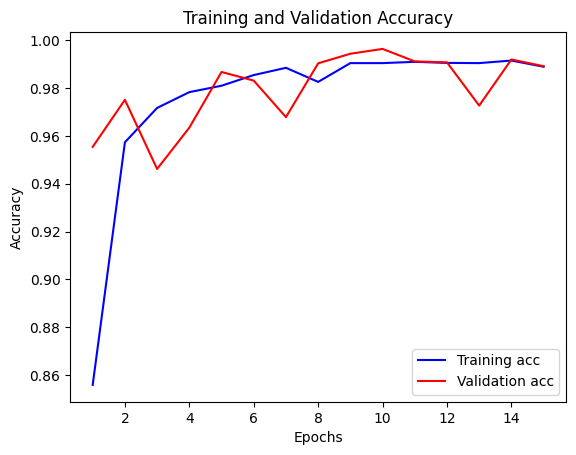

In [60]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

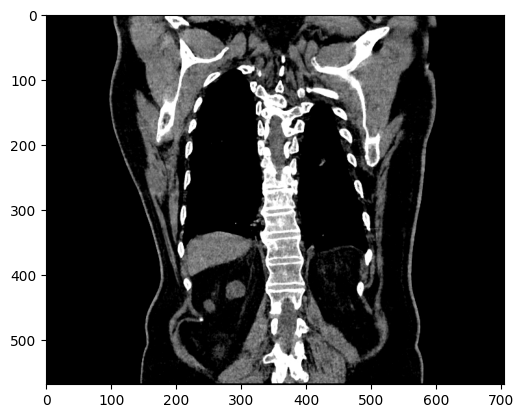

1/1 [==============================] - 1s 962ms/step


'Cyst'

In [61]:
img = cv2.imread('/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (1).jpg')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (150,150))
yhat = mobile_net.predict(np.expand_dims(resize/255, 0))
max_index = np.argmax(yhat)
label_to_class_name[max_index]

**From the visual representation in the above graphs, a compelling pattern emerges, demonstrating MobileNet's superior performance compared to both CNN and VGG16. Notably, CNN exhibits clear signs of overfitting, where the model has essentially memorized the training data to an extent that its generalization capability is severely compromised. Conversely, VGG16 appears to suffer from underfitting, indicating that it may not have captured the underlying complexities of the data, leading to a less optimal model performance.**

**MobileNet, on the other hand, stands out as the most balanced and effective option. Its capacity to generalize well to unseen data while maintaining robust performance on the training data makes it a promising choice for this particular task. These insights from the graphical representations underscore the importance of model selection and the significance of striking a balance between underfitting and overfitting, ultimately contributing to the successful deployment of deep learning models in practical applications**

# Saving Model

In [62]:
mobile_net.save("model.h5")

In [63]:
loaded_model = tf.keras.models.load_model("/kaggle/working/model.h5")

# Testing Model

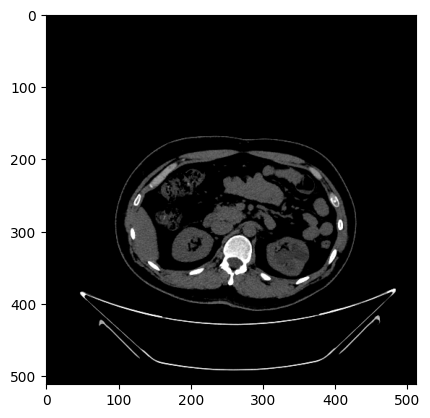

1/1 [==============================] - 1s 716ms/step


'Cyst'

In [64]:
img = cv2.imread('/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (1000).jpg')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (150,150))
yhat = loaded_model.predict(np.expand_dims(resize/255, 0))
max_index = np.argmax(yhat)
label_to_class_name[max_index]